In [1]:
# importing necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

**Data Analysis**

In [2]:
data = pd.read_csv('ocr-reduced.csv')

data.head()

,status,name_of_covered_entity,individuals_affected,breach_submission_date,web_description,location_of_breached_information,state,covered_entity_type,type_of_breach,business_associate_present
0,current,St Joseph Heritage Health,7216,06/28/2022,NaN,Network Server,CA,Healthcare Provider,Hacking/IT Incident,Yes
1,current,"Regal Medical Group,Lakeside Medical Organizat...",3300638,02/01/2023,NaN,Network Server,CA,Healthcare Provider,Hacking/IT Incident,No
2,current,"WellDyneRx, LLC",43523,07/01/2022,NaN,Email,FL,Business Associate,Hacking/IT Incident,Yes
3,current,"Summit BHC West Virginia, LLC d/b/a Highland H...",1298,02/10/2022,NaN,Email,WV,Healthcare Provider,Hacking/IT Incident,No
4,current,"CareNet Medical Group, PC",3359,06/02/2023,NaN,Network Server,NY,Healthcare Provider,Hacking/IT Incident,No


In [3]:
# uncomment below chunk to read data in JSONL format

# import json

# jsonl_file_path = 'ocr-reduced.jsonl'

# jsonl_data = []

# # reading JSONL data line by line
# with open(jsonl_file_path, 'r') as file:
#     for line in file:
#         json_object = json.loads(line)
#         jsonl_data.append(json_object)


# jsonl_data[:5]

**Data Summary**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   status                            1000 non-null   object
 1   name_of_covered_entity            1000 non-null   object
 2   individuals_affected              1000 non-null   int64 
 3   breach_submission_date            1000 non-null   object
 4   web_description                   4 non-null      object
 5   location_of_breached_information  1000 non-null   object
 6   state                             996 non-null    object
 7   covered_entity_type               999 non-null    object
 8   type_of_breach                    1000 non-null   object
 9   business_associate_present        1000 non-null   object
dtypes: int64(1), object(9)
memory usage: 78.3+ KB


**DataFrame Size:**
- The DataFrame has 1000 entries (rows).
- The index is a RangeIndex from 0 to 999.

**Data Columns:**
- There are 10 columns in total.

**Data Types:**
- The data types of the columns are as follows:
  - `object`:  9 columns are string or categorical data. However, note that breach_submission_date should be changed into date.
  - `int64`: 1 column includes data in a 64-bit integer type.

**Memory Usage:**
- The memory usage of the DataFrame is approximately 78.3 KB.

**Non-Null Counts:**
- The "Non-Null Count" for each column indicates the number of non-null (non-missing) entries.
- For example, "breach_submission_date" has 1000 non-null entries, "web_description" has 4 non-null entries, and so on.

**Missing Values:**
- Columns with missing values (NaN or null) are visible. For instance, "web_description" has a relatively low count of non-null entries (4), suggesting that there are many missing values in this column.

**Potential Data Quality Issues:**
- There are missing values in columns like "web_description," "state," "covered_entity_type," suggesting potential data quality issues.

In [5]:
# let us change breach_submission_date  into date:
data['breach_submission_date'] = pd.to_datetime(data['breach_submission_date'])

In [6]:
data.describe()

,individuals_affected,breach_submission_date
count,1.000000e+03,1000
mean,1.658451e+05,2023-01-06 13:29:16.799999744
min,5.000000e+02,2018-07-13 00:00:00
25%,1.305250e+03,2022-08-04 18:00:00
50%,5.732500e+03,2023-03-01 00:00:00
75%,4.090875e+04,2023-07-11 00:00:00
max,1.127000e+07,2023-11-22 00:00:00
std,7.506703e+05,NaN


- **Individuals Affected:**
  - The number of individuals affected ranges from 500 to 11,270,000.
  - The mean (average) number of individuals affected is approximately 165,845.
  - The standard deviation is approximately 750,670, indicating variability in the data.

- **Breach Submission Date:**
  - Descriptive statistics for the breach submission date are shown.
  - The data type of the breach submission date is datetime.
  - The earliest breach submission date is on July 13, 2018, and the latest is on November 22, 2023.
  - The mean breach submission date is on January 6, 2023, at 13:29:16.

Note: The "std" value for the breach submission date is shown as "NaN," which typically occurs when the data type is not numerical (datetime in this case).

In [7]:
# checking number of duplicates, missing values and columns with a single value
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 0
Missing values: 1001
Single valued columns: Index([], dtype='object')


- There are no duplicated values, but we have missing values.

In [8]:
# let us analyze web_description column in order to understand 
# if we should keep it or drop as we have only 4 values and others are NAs

In [9]:
data[~data['web_description'].isna()]

,status,name_of_covered_entity,individuals_affected,breach_submission_date,web_description,location_of_breached_information,state,covered_entity_type,type_of_breach,business_associate_present
74,archive,"Dr. Douglas C. Shoenberger,PC",8179,2022-11-30,"The covered entity (CE), Dr. Douglas C. Shoenb...",Network Server,PA,Business Associate,Hacking/IT Incident,Yes
91,archive,University of Houston for UH College of Optometry,18500,2021-11-12,"The covered entity (CE), University of Houston...",Network Server,TX,Healthcare Provider,Hacking/IT Incident,No
998,archive,Gillette Children's Specialty Healthcare,542,2023-09-29,"The covered entity (CE), Gillette Children's S...",Network Server,MN,Healthcare Provider,Hacking/IT Incident,Yes
999,archive,"United Bankshares, Inc.",8801,2023-08-11,"The business associate (BA), United Bankshares...",Network Server,DC,Business Associate,Hacking/IT Incident,Yes


In [10]:
data['web_description'].unique()

array([nan,
       'The covered entity (CE), Dr. Douglas C. Shoenberger, PC, reported that its business associate’s (BA) subcontractor suffered a ransomware attack affecting the protected health information (PHI) of 8,179 individuals. The PHI involved included names, dates of births, addresses, Social Security numbers, drivers’ license numbers, diagnoses, lab results, medications, and other treatment information. The BA notified HHS, affected individuals, the media, and provided substitute notice. In response to the breach, the CE terminated its business relationship with its BA’s subcontractor, implemented additional technical safeguards, revised its policies and procedures, and provided complimentary credit monitoring services to affected individuals.',
       'The covered entity (CE), University of Houston College of Optometry, reported that it was the victim of a ransomware attack affecting the protected health information (PHI) of 18,500 individuals. The PHI involved included name

## Column Descriptions:

### 1. `status`:
    Indicates whether the record is "current" or "archive." In the context of a data breach dataset "Current" status may indicate active or recent security incidents that are still being addressed or investigated. "Archive" status may represent historical security incidents that have been resolved, closed, or are no longer considered active.

### 2. `name_of_covered_entity`:
    The name of the covered entity involved in the security incident. In this case it  typically refers to the name of the organization or entity that experienced the data breach. 


### 3. `individuals_affected`:
    The number of individuals affected by the security incident.


### 4. `breach_submission_date`:
    The date when the breach was submitted or reported. In the context of data security and privacy, the term "breach" refers to an incident where unauthorized access, disclosure, or acquisition of sensitive information occurs. A data breach can involve various types of information, including personal data, financial records, or other confidential data.

### 5. `web_description`:
    Textual descriptions related to the security incidents and their impacts.

### 6. `location_of_breached_information`:
    The location where the breached information was stored (e.g., Network Server). It provides information about the specific location or system where the breached information was stored at the time of the security incident. This information is crucial for understanding the scope and potential impact of the breach. 

### 7. `state`:
    The state associated with the covered entity or business associate.

### 8. `covered_entity_type`:
    The type of entity affected, such as "Healthcare Provider" or "Business Associate."

### 9. `type_of_breach`:
    Describes the type of breach, such as "Hacking/IT Incident" or "Unauthorized Access/Disclosure."

### 10. `business_associate_present`:
    Indicates whether a business associate was present during the security incident (Yes/No). Probably, in the context of healthcare and data security, a business associate refers to an individual or entity that performs certain functions or activities on behalf of a covered entity.
    
**Decison**: after looking through the data, and the text descriptions of the web_description column, I see that main data presented in the description is included in different columns, for example number of affected individuals in the individuals_affected column, name of the entity in the name_of_covered_entity, and considering the fact that only 4 descriptions are present and 996 are NAs I am going to drop the web_description column, however I am using its information for defining the data description for my report!

In [11]:
data.drop('web_description', axis=1, inplace=True)

In [12]:
print("Missing values:", data.isna().sum().sum())
# it just remains 5 missing value

Missing values: 5


In [13]:
# I will fill missing values in 'state' and 'covered_entity_type' with the mode
# as there are few NAs problem is not crucial, of course, it is not always good filling NAs without more research
data['state'].fillna(data['state'].mode()[0], inplace=True)
data['covered_entity_type'].fillna(data['covered_entity_type'].mode()[0], inplace=True)

In [14]:
# now we do not have more missing values
print("Missing values:", data.isna().sum().sum())

Missing values: 0


In [15]:
for col in data.columns:
    unique_values = data[col].unique()
    
    if col == 'web_description':
        print(f"{col}: {len(unique_values)} unique values", "\n")
    else:
        if len(unique_values) > 5:
            print(f"{col}: {len(unique_values)} unique values", "\n")
        else:
            print(f"{col}: {unique_values}", "\n")

status: ['current' 'archive'] 

name_of_covered_entity: 917 unique values 

individuals_affected: 869 unique values 

breach_submission_date: 415 unique values 

location_of_breached_information: 22 unique values 

state: 50 unique values 

covered_entity_type: ['Healthcare Provider' 'Business Associate' 'Health Plan'
 'Healthcare Clearing House'] 

type_of_breach: ['Hacking/IT Incident' 'Theft' 'Unauthorized Access/Disclosure'
 'Improper Disposal' 'Loss'] 

business_associate_present: ['Yes' 'No'] 



**Insights and observations:**

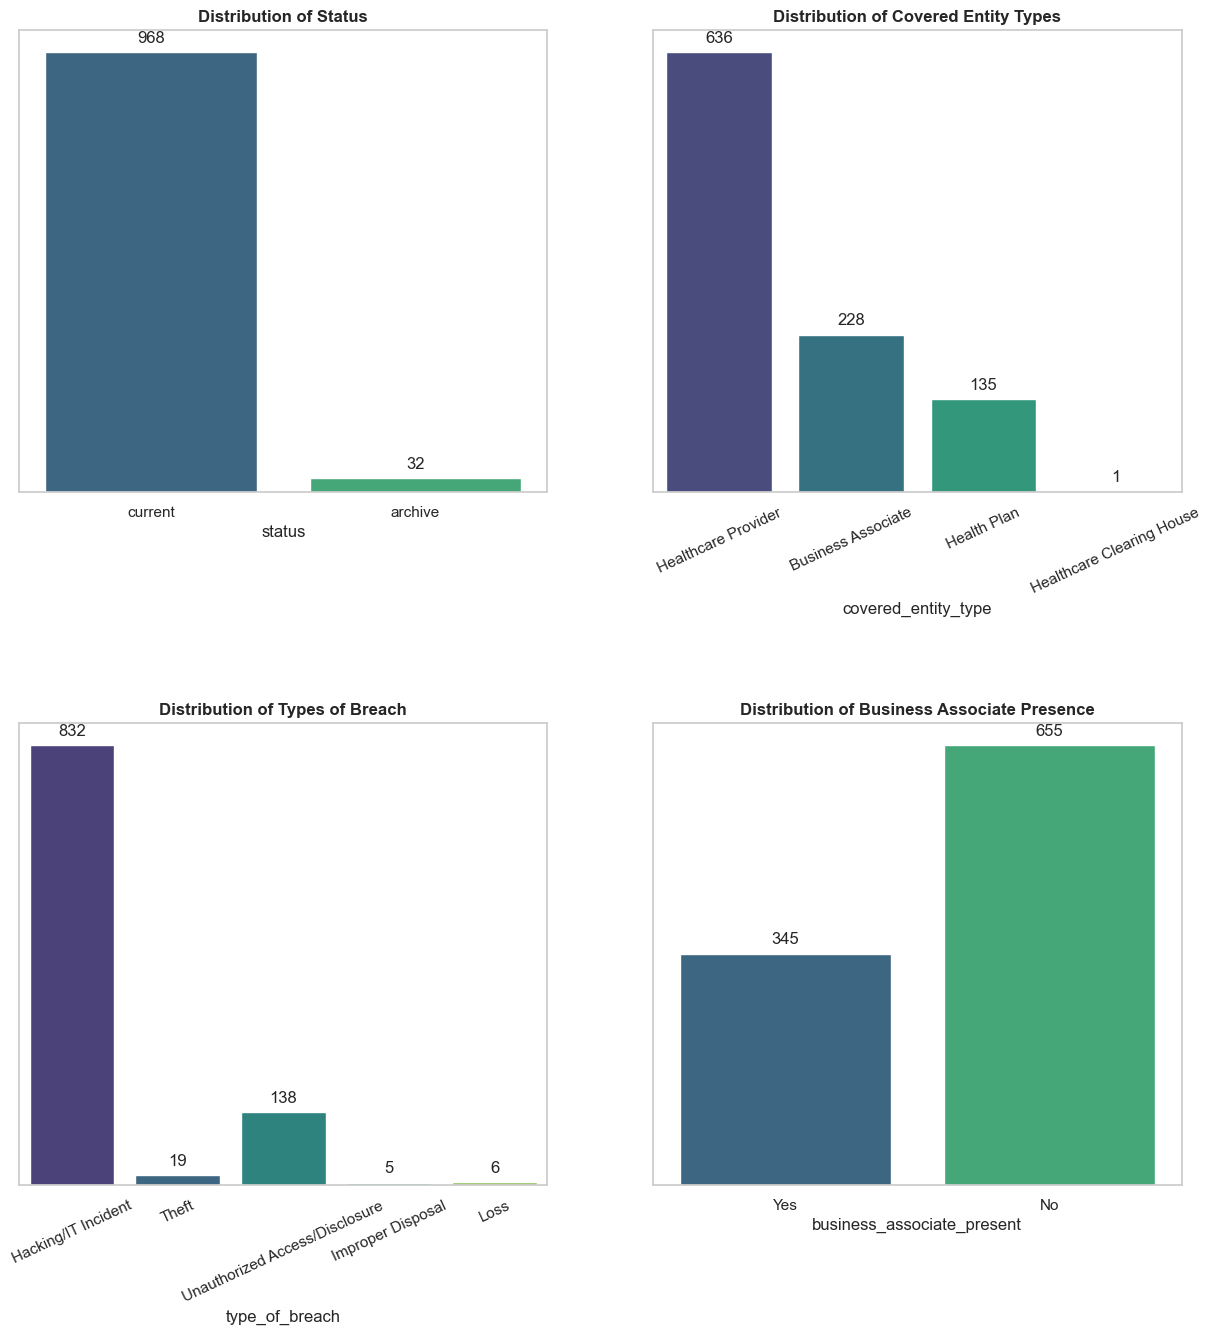

In [16]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15), gridspec_kw={'hspace': 0.5})

sns.countplot(x='status', data=data, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Distribution of Status', fontweight='bold')  
axes[0, 0].get_yaxis().set_visible(False)
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.countplot(x='covered_entity_type', data=data, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Distribution of Covered Entity Types', fontweight='bold')  
axes[0, 1].get_yaxis().set_visible(False)
axes[0, 1].tick_params(axis='x', rotation=25)
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.countplot(x='type_of_breach', data=data, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Distribution of Types of Breach', fontweight='bold')  
axes[1, 0].get_yaxis().set_visible(False)
axes[1, 0].tick_params(axis='x', rotation=25)
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.countplot(x='business_associate_present', data=data, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Distribution of Business Associate Presence', fontweight='bold')  
axes[1, 1].get_yaxis().set_visible(False)
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

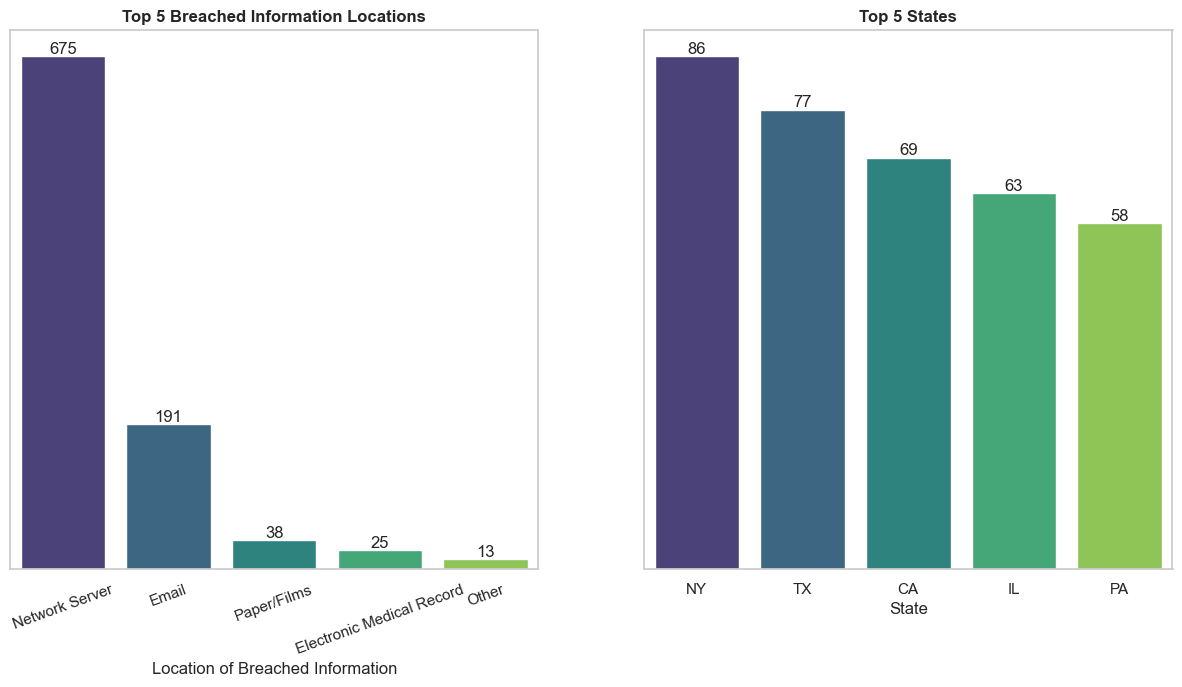

In [17]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), gridspec_kw={'hspace': 0.3})


top_locations = data['location_of_breached_information'].value_counts().head(5)
sns.barplot(x=top_locations.index, y=top_locations.values, ax=axes[0], palette='viridis')
axes[0].set_title('Top 5 Breached Information Locations', fontweight='bold')
axes[0].set_xlabel('Location of Breached Information')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
axes[0].xaxis.set_visible(True)
axes[0].yaxis.set_visible(False)
axes[0].spines['right'].set_visible(True)
axes[0].spines['left'].set_visible(True)
axes[0].spines['top'].set_visible(True)
axes[0].spines['bottom'].set_visible(True)
axes[0].tick_params(axis='x', rotation=20)


top_states = data['state'].value_counts().head(5)
sns.barplot(x=top_states.index, y=top_states.values, ax=axes[1], palette='viridis')
axes[1].set_title('Top 5 States', fontweight='bold')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Count')
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
axes[1].xaxis.set_visible(True)
axes[1].yaxis.set_visible(False)
axes[1].spines['right'].set_visible(True)
axes[1].spines['left'].set_visible(True)
axes[1].spines['top'].set_visible(True)
axes[1].spines['bottom'].set_visible(True)
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


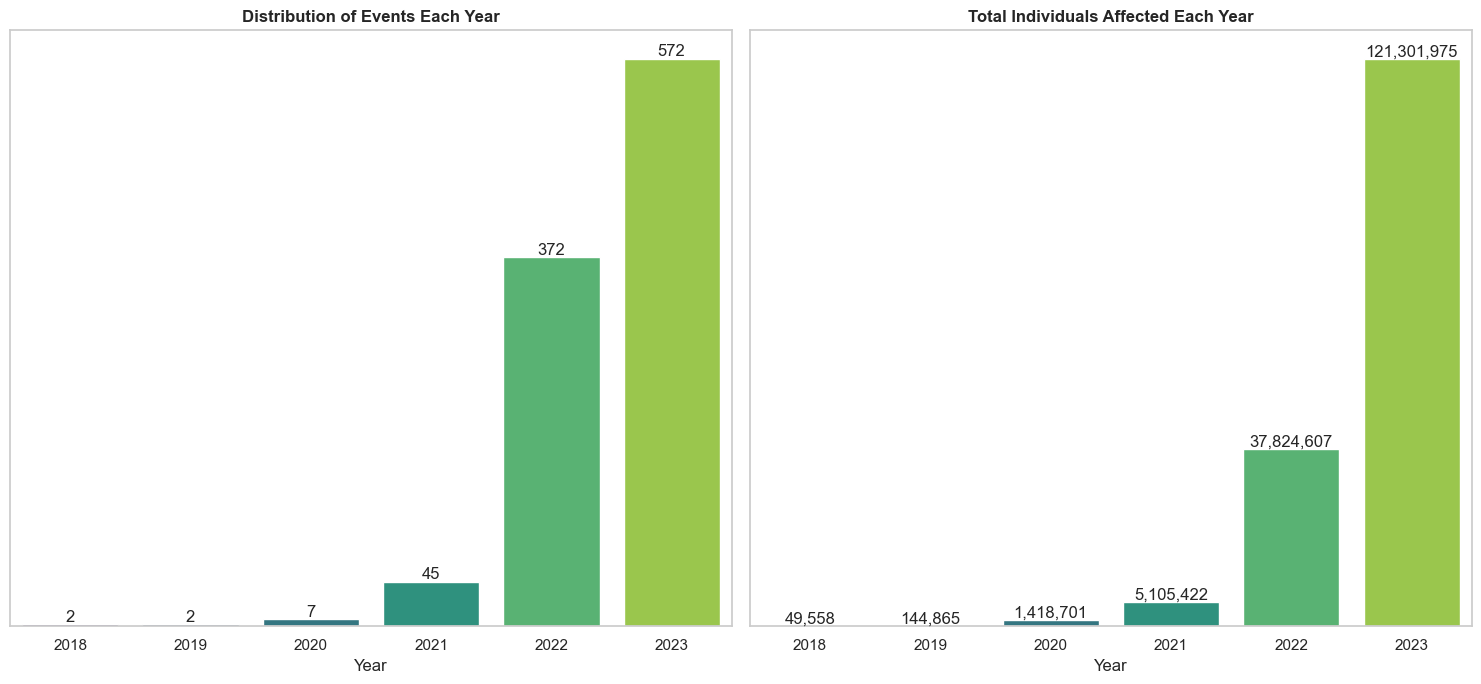

In [18]:
data['year'] = data['breach_submission_date'].dt.year

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

countplot = sns.countplot(x='year', data=data, palette='viridis', ax=axes[0])
countplot.set_title('Distribution of Events Each Year', fontweight='bold')
countplot.set_xlabel('Year')
countplot.set_ylabel('')
countplot.yaxis.set_visible(False)

for p in countplot.patches:
    countplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

total_individuals_by_year = data.groupby('year')['individuals_affected'].sum()
barplot = sns.barplot(x=total_individuals_by_year.index, y=total_individuals_by_year.values, palette='viridis', ax=axes[1])
barplot.set_title('Total Individuals Affected Each Year', fontweight='bold')
barplot.set_xlabel('Year')
barplot.set_ylabel('')
barplot.yaxis.set_visible(False)

barplot.yaxis.set_visible(False)
barplot.yaxis.tick_left()
barplot.spines['right'].set_visible(True)
barplot.spines['left'].set_visible(True)
barplot.spines['top'].set_visible(True)
barplot.spines['bottom'].set_visible(True)

for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()